## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

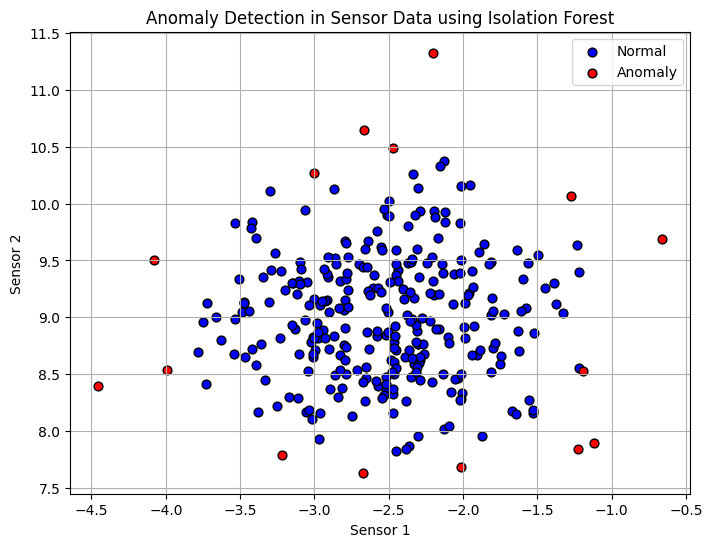

anomaly
normal     285
anomaly     15
Name: count, dtype: int64


In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Step 1: Load or Generate Synthetic Sensor Data
# For the purpose of this example, we generate synthetic sensor data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
df = pd.DataFrame(X, columns=['Sensor_1', 'Sensor_2'])

# Step 2: Feature Selection
# Select relevant features for anomaly detection (in this case, both features)
features = df[['Sensor_1', 'Sensor_2']]

# Step 3: Apply Isolation Forest for Anomaly Detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(features)

# Predict anomalies (-1 = anomaly, 1 = normal)
predictions = model.predict(features)

# Add the anomaly predictions to the DataFrame
df['anomaly'] = np.where(predictions == -1, 'anomaly', 'normal')

# Step 4: Visualize the Results
plt.figure(figsize=(8, 6))

# Normal data points (blue)
plt.scatter(df[df['anomaly'] == 'normal']['Sensor_1'],
            df[df['anomaly'] == 'normal']['Sensor_2'],
            c='blue', label='Normal', edgecolor='k', s=40)

# Anomalies (red)
plt.scatter(df[df['anomaly'] == 'anomaly']['Sensor_1'],
            df[df['anomaly'] == 'anomaly']['Sensor_2'],
            c='red', label='Anomaly', edgecolor='k', s=40)

plt.title("Anomaly Detection in Sensor Data using Isolation Forest")
plt.xlabel("Sensor 1")
plt.ylabel("Sensor 2")
plt.legend()
plt.grid(True)
plt.show()

# Display the anomaly counts
print(df['anomaly'].value_counts())